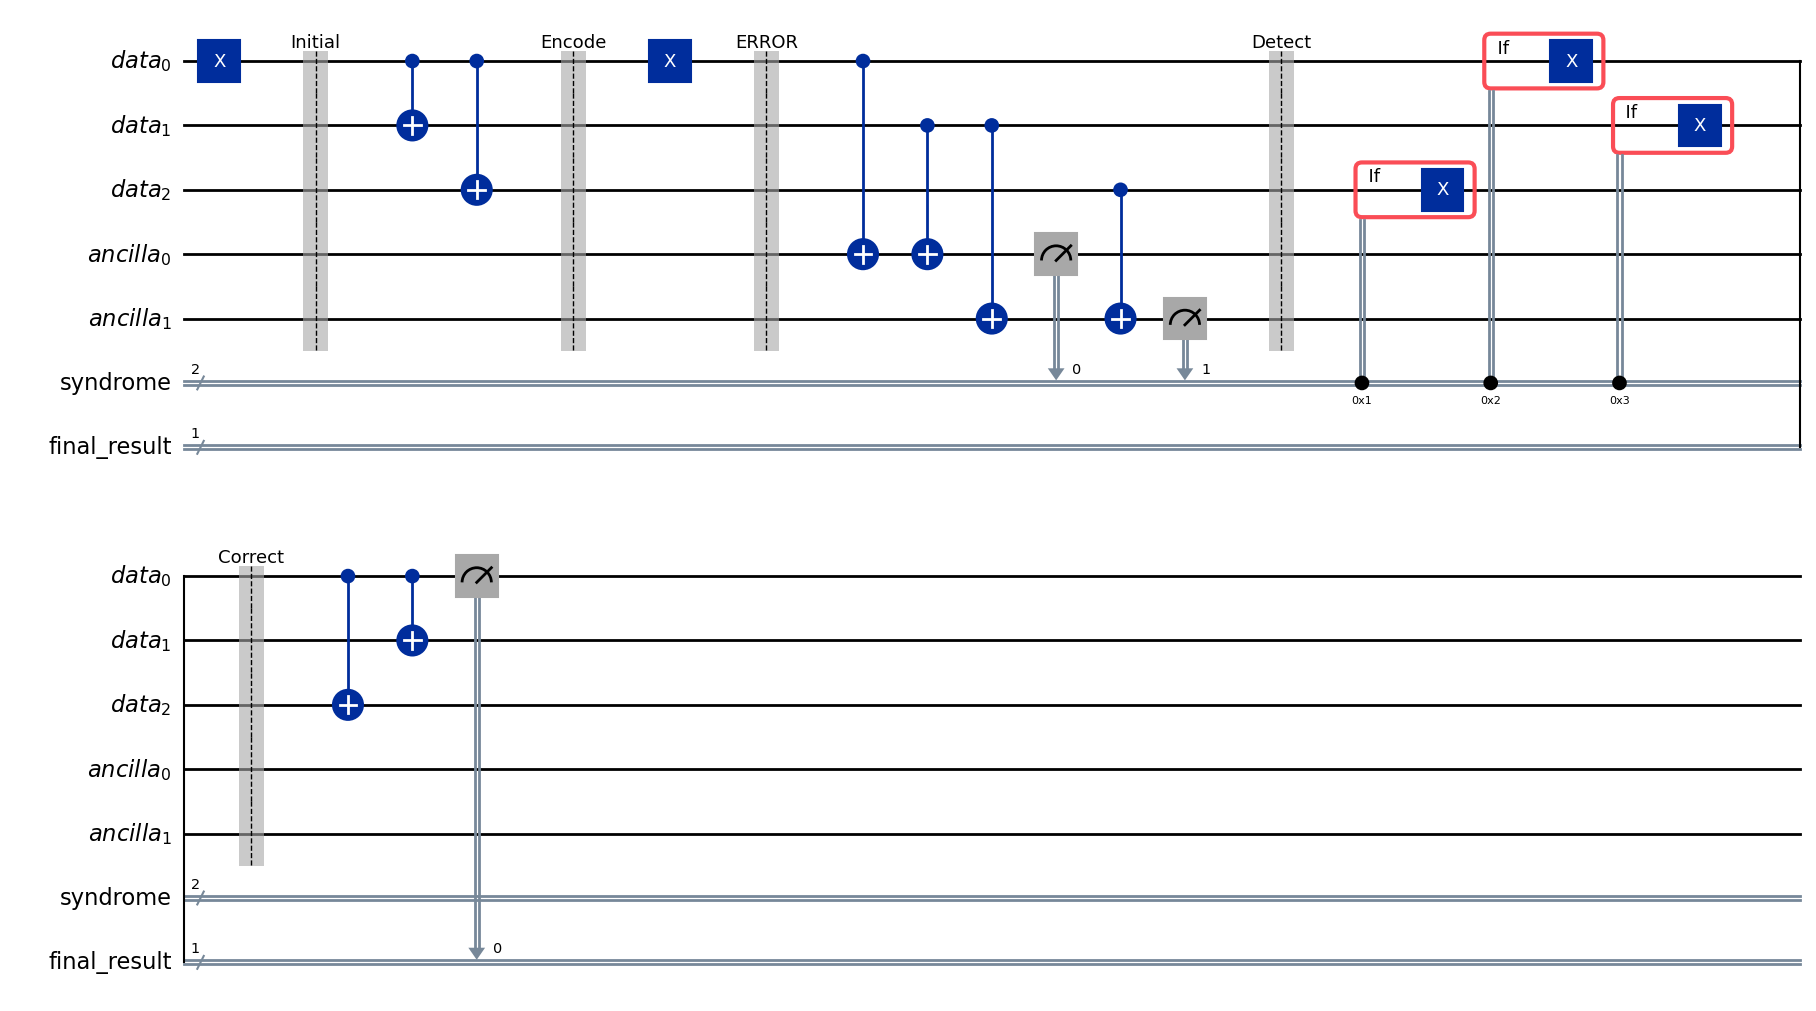


Simulation Results (final_result, syndrome):
{'0 01': 1024}


In [13]:
#This project will demonstrate a fundamental Quantum Error Correction (QEC) technique. 
#The goal is to protect a single, "logical" qubit (| psi > = 1) from a bit-flip (X) error.
#To do this, I encoded the state across 3 "physical" qubits, creating an entangled "logical state" |psi > = | 111 >. 
#If a bit-flip error corrupts one qubit (e.g | 011 >, then the code detect it without measuring the data itself. 
#Then used 2 "ancilla" (helper) qubits to check the parity (agreement) between the data qubits. 
#This measurement, called an "error syndrome," tells us precisely which qubit flipped.
# If syndrome is '01' (01), error is on q_data[2]
# If syndrome is '10' (2), error is on q_data[0]
# If syndrome is '11' (3), error is on q_data[1]
# Finally, we correct the error by ap-plying an X gate to the identified qubit.
# Thus perfectly restoring the original logical state and saving the quantum information
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_circuit_layout
import matplotlib.pyplot as plt


q_data = QuantumRegister(3, name="data")
q_ancilla = QuantumRegister(2, name="ancilla")
c_syndrome = ClassicalRegister(2, name="syndrome")
c_final = ClassicalRegister(1, name="final_result")

qc = QuantumCircuit(q_data, q_ancilla, c_syndrome, c_final)

qc.x(q_data[0])
qc.barrier(label="Initial")

qc.cx(q_data[0], q_data[1])
qc.cx(q_data[0], q_data[2])
qc.barrier(label="Encode")

# adding an error to the first qubit (data[0])
qc.x(q_data[0])
qc.barrier(label="ERROR")

# DETECT Step (Syndrome Measurement)
qc.cx(q_data[0], q_ancilla[0])
qc.cx(q_data[1], q_ancilla[0]) # ancilla[0] = q0 + q1
qc.cx(q_data[1], q_ancilla[1])
qc.cx(q_data[2], q_ancilla[1]) # ancilla[1] = q1 + q2
qc.measure(q_ancilla, c_syndrome)
qc.barrier(label="Detect")

# Correct step
with qc.if_test((c_syndrome, 1)): # Syndrome '01'
    qc.x(q_data[2])
with qc.if_test((c_syndrome, 2)): # Syndrome '10'
    qc.x(q_data[0])
with qc.if_test((c_syndrome, 3)): # Syndrome '11'
    qc.x(q_data[1])
qc.barrier(label="Correct")

# Decoding and veryfying
qc.cx(q_data[0], q_data[2])
qc.cx(q_data[0], q_data[1])
qc.measure(q_data[0], c_final[0])

display(qc.draw(output='mpl'))

simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
results = job.result()
counts = results.get_counts(qc)

print("\nSimulation Results (final_result, syndrome):")
print(counts)
# plt.show()


# Results:
#'1 10': This string is c_final c_syndrome.
#c_syndrome = 10: The syndrome was 10. This correctly told the circuit that the error was on q_data[0].
#c_final = 1: The final measured result was 1
#This proves the code worked It caught the 10 syndrome, applied the correction to q_data[0], and successfully restored the logical state to |1>